Original Image


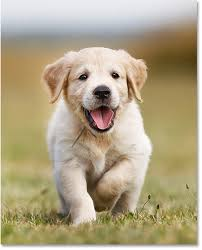

Image Size: 250 x 202 x 3
Total Pixels: 50500
Grayscale Image


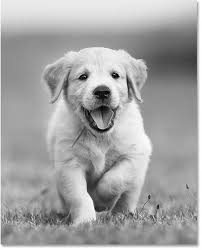

Binary Image


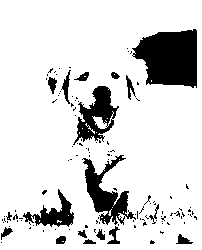

Number of Black Pixels: 7603


In [2]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Basic Image Manipulation
# 1. Read the image
image = cv2.imread('images.jpg')

# 2. Display the image
print('Original Image')
cv2_imshow(image)


# 3. Extraction of Image Size
height, width, channels = image.shape
print(f'Image Size: {height} x {width} x {channels}')

# 4. Calculation of Image Pixels
total_pixels = height * width
print(f'Total Pixels: {total_pixels}')

# 5. Convert RGB to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print('Grayscale Image')
cv2_imshow(gray_image)


# 6. Convert RGB to Grayscale and Binary Image (Thresholding)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
print('Binary Image')
cv2_imshow(binary_image)

# Count the area of black pixels
black_pixels = np.sum(binary_image == 0)
print(f'Number of Black Pixels: {black_pixels}')



Sobel Edge-


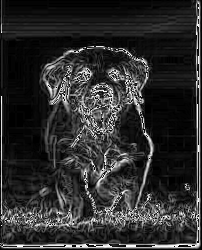

Prewitt Edge


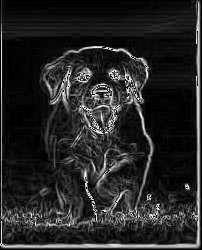

Roberts Edge


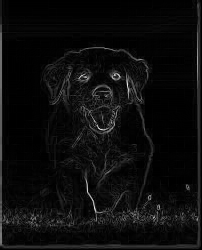

Canny Edge


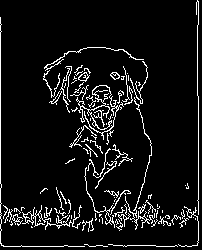

Threshold Segmentation


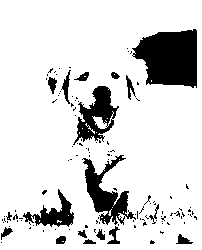

Adaptive Threshold Segmentation


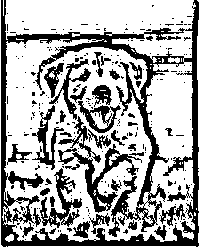

Segmented Edge (Canny)


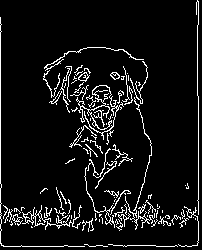

Watershed Segmentation


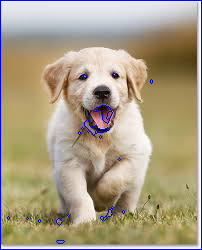

In [3]:
# Task 2: Edge Detection and Image Segmentation
# 1. Perform Edge Detection using Sobel, Prewitt, Roberts, and Canny

# Sobel Operator
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)

# Prewitt Operator (using convolution with Prewitt kernel)
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = cv2.filter2D(gray_image, cv2.CV_64F, prewitt_kernel_x)
prewitt_y = cv2.filter2D(gray_image, cv2.CV_64F, prewitt_kernel_y)
prewitt_edge = cv2.magnitude(prewitt_x, prewitt_y)

# Roberts Cross Operator
roberts_kernel_x = np.array([[1, 0], [0, -1]])
roberts_kernel_y = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(gray_image, cv2.CV_64F, roberts_kernel_x)
roberts_y = cv2.filter2D(gray_image, cv2.CV_64F, roberts_kernel_y)
roberts_edge = cv2.magnitude(roberts_x, roberts_y)

# Canny Edge Detection
canny_edge = cv2.Canny(gray_image, 100, 200)

# 2. Perform Image Segmentation
# i. Global Thresholding
_, threshold_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# ii. Adaptive Thresholding
adaptive_thresh_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# iii. Edge Detection for Segmentation
# (Using Canny for segmentation)
segmented_edge = cv2.Canny(gray_image, 100, 200)

# iv. Region-Based Segmentation (Watershed Algorithm)
# Convert image to grayscale and prepare markers for watershed
ret, markers = cv2.connectedComponents(threshold_image)
markers = markers + 1
markers[threshold_image == 0] = 0

# Apply watershed
image_copy = image.copy()
cv2.watershed(image_copy, markers)
image_copy[markers == -1] = [255, 0, 0]

# Show results
print('Sobel Edge-')
cv2_imshow(sobel_edge.astype(np.uint8))
print('Prewitt Edge')
cv2_imshow(prewitt_edge.astype(np.uint8))
print('Roberts Edge')
cv2_imshow(roberts_edge.astype(np.uint8))
print('Canny Edge')
cv2_imshow(canny_edge)
print('Threshold Segmentation')
cv2_imshow(threshold_image)
print('Adaptive Threshold Segmentation')
cv2_imshow(adaptive_thresh_image)
print('Segmented Edge (Canny)')
cv2_imshow(segmented_edge)
print('Watershed Segmentation')
cv2_imshow(image_copy)